In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Preparing Data for Unsupervised Learning

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


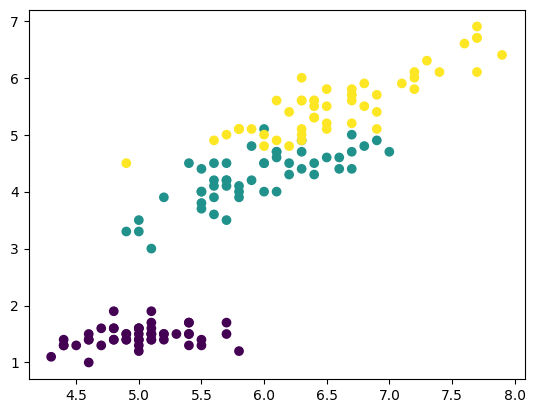

In [1]:
# Importing Modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Loading dataset
iris_df = datasets.load_iris()

# Available methods on dataset
print(dir(iris_df))

# Features
print(iris_df.feature_names)

# Targets
print(iris_df.target)

# Target Names
print(iris_df.target_names)
label = {0: 'red', 1: 'blue', 2: 'green'}

# Dataset Slicing
x_axis = iris_df.data[:, 0]  # Sepal Length
y_axis = iris_df.data[:, 2]  # Sepal Width

# Plotting
plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

## K-Means Clustering

In [2]:
# Importing Modules
from sklearn import datasets
from sklearn.cluster import KMeans

# Loading dataset
iris_df = datasets.load_iris()

# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
model.fit(iris_df.data)

# Predicitng a single input
predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])

# Prediction on the entire data
all_predictions = model.predict(iris_df.data)

# Printing Predictions
print(predicted_label)
print(all_predictions)

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Hierarchical Clustering

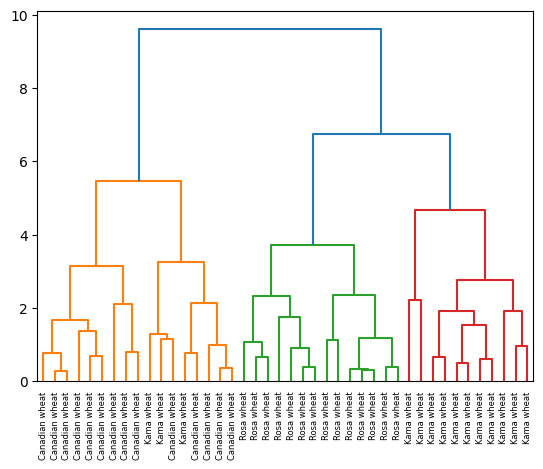

In [3]:
# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Reading the DataFrame
seeds_df = pd.read_csv(
    "https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

## t-SNE Clustering

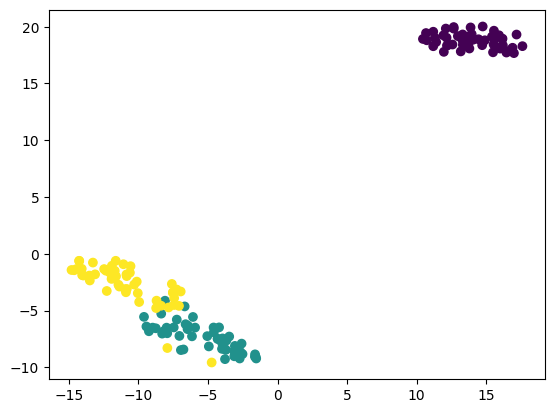

In [4]:
# Importing Modules
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Loading dataset
iris_df = datasets.load_iris()

# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(iris_df.data)

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=iris_df.target)
plt.show()

## DBSCAN Clustering

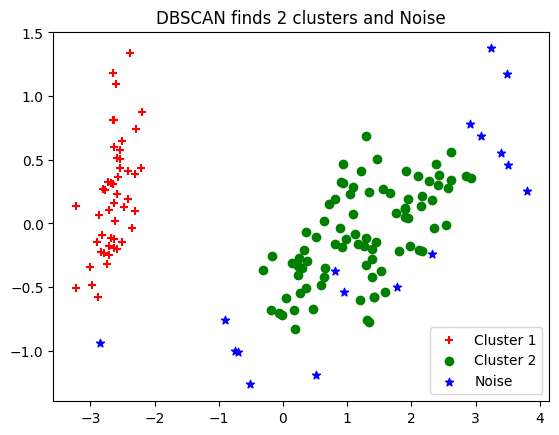

In [5]:
# Importing Modules
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

# Load Dataset
iris = load_iris()

# Declaring Model
dbscan = DBSCAN()

# Fitting
dbscan.fit(iris.data)

# Transoring Using PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

# Plot based on Class
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')

plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and Noise')
plt.show()

## References

https://builtin.com/data-science/unsupervised-learning-python